In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates 
%matplotlib inline 
plt.style.use('fivethirtyeight')
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
import plotly.offline as py
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt



In [2]:
# Load the seaice.csv dataset.
seaice_df = pd.read_csv("/Users/umabh/DataClass/climate_change_gp/Resources/seaice.csv")
seaice_df

,Year,Month,Day,Extent,Missing,Source_Data,hemisphere
0,1978,10,26,10.231,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north
1,1978,10,28,10.420,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north
2,1978,10,30,10.557,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north
3,1978,11,1,10.670,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north
4,1978,11,3,10.777,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north
...,...,...,...,...,...,...,...
23855,2015,12,27,8.358,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south
23856,2015,12,28,8.098,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south
23857,2015,12,29,7.791,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south
23858,2015,12,30,7.494,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south


In [3]:
seaice_df.dtypes

Year             int64
Month            int64
Day              int64
Extent         float64
Missing          int64
Source_Data     object
hemisphere      object
dtype: object

In [4]:
seaice_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23860 entries, 0 to 23859
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         23860 non-null  int64  
 1   Month        23860 non-null  int64  
 2   Day          23860 non-null  int64  
 3   Extent       23860 non-null  float64
 4   Missing      23860 non-null  int64  
 5   Source_Data  23860 non-null  object 
 6   hemisphere   23860 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.3+ MB


In [5]:
seaice_df.describe()

,Year,Month,Day,Extent,Missing
count,23860.000000,23860.000000,23860.000000,23860.000000,23860.0
mean,1998.851635,6.550293,15.742917,11.603068,0.0
std,9.951976,3.447684,8.802258,4.586068,0.0
min,1978.000000,1.000000,1.000000,2.264000,0.0
25%,1991.000000,4.000000,8.000000,7.747750,0.0
50%,1999.000000,7.000000,16.000000,12.297000,0.0
75%,2007.000000,10.000000,23.000000,15.197250,0.0
max,2015.000000,12.000000,31.000000,20.201000,0.0


In [6]:
# delete Source Data column as it not useful for our analysis
del seaice_df['Source_Data']

In [7]:
# drop 1978 as it has very few entries
seaice_df.drop(seaice_df[seaice_df['Year']== 1978].index,inplace=True)
seaice_df

,Year,Month,Day,Extent,Missing,Source_Data,hemisphere
34,1979,1,2,14.997,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north
35,1979,1,4,14.922,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north
36,1979,1,6,14.929,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north
37,1979,1,8,14.968,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north
38,1979,1,10,15.190,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north
...,...,...,...,...,...,...,...
23855,2015,12,27,8.358,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south
23856,2015,12,28,8.098,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south
23857,2015,12,29,7.791,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south
23858,2015,12,30,7.494,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south


In [8]:
seaice_df['Extent'].describe()


count    23792.000000
mean        11.599141
std          4.589941
min          2.264000
25%          7.734750
50%         12.294500
75%         15.200000
max         20.201000
Name: Extent, dtype: float64

In [9]:
seaice_df['Date'] = pd.to_datetime(seaice_df[['Year','Month','Day']])
seaice_df.index = seaice_df['Date'].values
seaice_df.head()

,Year,Month,Day,Extent,Missing,Source_Data,hemisphere,Date
1979-01-02,1979,1,2,14.997,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,1979-01-02
1979-01-04,1979,1,4,14.922,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,1979-01-04
1979-01-06,1979,1,6,14.929,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,1979-01-06
1979-01-08,1979,1,8,14.968,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,1979-01-08
1979-01-10,1979,1,10,15.190,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,1979-01-10


### Annual Average Sea Ice Extent

In [10]:
# Group the dataset by year
iceyears_df = seaice_df.groupby(seaice_df['Year'])


In [11]:
# Pull out mean of the 'Extent' variable
annualextent_df = iceyears_df.mean()['Extent']
annualextent_df.head() 

Year
1979    12.019349
1980    11.785219
1981    11.776148
1982    12.048755
1983    11.852904
Name: Extent, dtype: float64

Text(0.5, 0, 'Year')

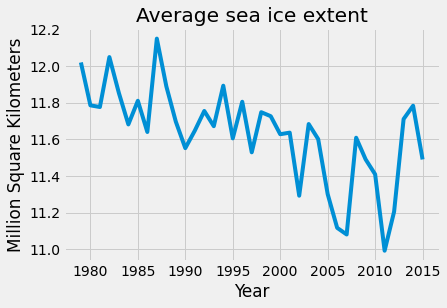

In [12]:
# plot the average annual extent
plt.plot(annualextent_df)
plt.title('Average sea ice extent')
plt.ylabel('Million Square Kilometers')
plt.xlabel('Year')


Yearly averages seem to indicate a reduction in the sea ice extent over the years, We will need to examine the impact of seasonal changes and also the trends by hemispheres  

### Monthly Average Sea Ice Extent

In [13]:
# Group the dataset by month
icemonths_df = seaice_df.groupby(seaice_df['Month'])


In [14]:
# Pull out mean of the 'Extent' variable
monthlyextent_df = icemonths_df.mean()['Extent']
monthlyextent_df.head() 

Month
1     9.696917
2     9.145930
3     9.713802
4    10.777345
5    11.743750
Name: Extent, dtype: float64

Text(0.5, 0, 'Month')

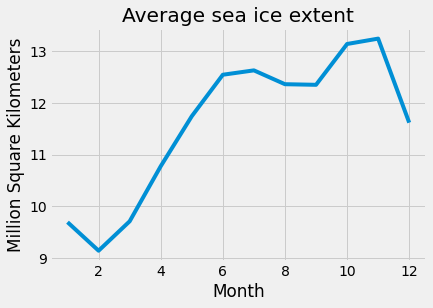

In [15]:
# plot the average monthly extent
plt.plot(monthlyextent_df)
plt.title('Average sea ice extent')
plt.ylabel('Million Square Kilometers')
plt.xlabel('Month')


### Lets now see the differences by hemispheres


In [16]:
northern_df = seaice_df[seaice_df['hemisphere'] == 'north']
northern_df

,Year,Month,Day,Extent,Missing,Source_Data,hemisphere,Date
1979-01-02,1979,1,2,14.997,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,1979-01-02
1979-01-04,1979,1,4,14.922,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,1979-01-04
1979-01-06,1979,1,6,14.929,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,1979-01-06
1979-01-08,1979,1,8,14.968,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,1979-01-08
1979-01-10,1979,1,10,15.190,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,1979-01-10
...,...,...,...,...,...,...,...,...
2015-12-27,2015,12,27,12.680,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,2015-12-27
2015-12-28,2015,12,28,12.745,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,2015-12-28
2015-12-29,2015,12,29,12.762,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,2015-12-29
2015-12-30,2015,12,30,12.800,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,north,2015-12-30


### Annual Average Sea Ice Extent - Northern Hemisphere

In [17]:
# Group the dataset by year
nhiceyears_df = northern_df.groupby(northern_df['Year'])


In [18]:
# Pull out mean of the 'Extent' variable
nhannualextent_df = nhiceyears_df.mean()['Extent']
nhannualextent_df.head() 

Year
1979    12.319560
1980    12.334148
1981    12.135486
1982    12.439445
1983    12.335896
Name: Extent, dtype: float64

Text(0.5, 0, 'Year')

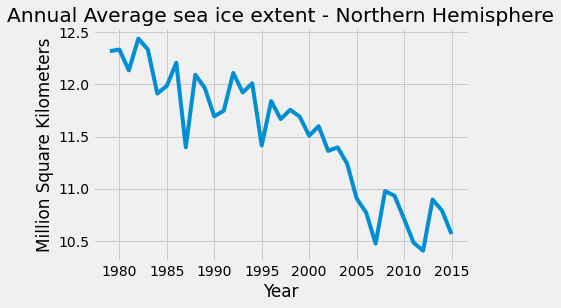

In [19]:
# plot the average annual extent
plt.plot(nhannualextent_df)
plt.title('Annual Average sea ice extent - Northern Hemisphere')
plt.ylabel('Million Square Kilometers')
plt.xlabel('Year')


### Monthly Average Sea Ice Extent - Northern Hemisphere

In [20]:
# Group the dataset by month
nhicemonths_df = northern_df.groupby(northern_df['Month'])


In [21]:
# Pull out mean of the 'Extent' variable
nhmonthlyextent_df = nhicemonths_df.mean()['Extent']
nhmonthlyextent_df.head() 

Month
1    14.283332
2    15.152538
3    15.306848
4    14.583496
5    13.175670
Name: Extent, dtype: float64

Text(0.5, 0, 'Month')

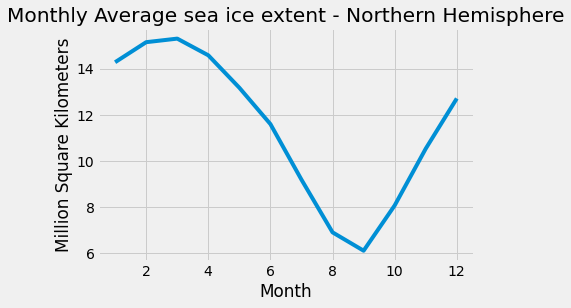

In [22]:
# plot the average monthly extent
plt.plot(nhmonthlyextent_df)
plt.title('Monthly Average sea ice extent - Northern Hemisphere')
plt.ylabel('Million Square Kilometers')
plt.xlabel('Month')


In [23]:
southern_df = seaice_df[seaice_df['hemisphere']== 'south']
southern_df

,Year,Month,Day,Extent,Missing,Source_Data,hemisphere,Date
1979-01-02,1979,1,2,6.945,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south,1979-01-02
1979-01-04,1979,1,4,6.838,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south,1979-01-04
1979-01-06,1979,1,6,6.638,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south,1979-01-06
1979-01-08,1979,1,8,6.270,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south,1979-01-08
1979-01-10,1979,1,10,6.138,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south,1979-01-10
...,...,...,...,...,...,...,...,...
2015-12-27,2015,12,27,8.358,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south,2015-12-27
2015-12-28,2015,12,28,8.098,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south,2015-12-28
2015-12-29,2015,12,29,7.791,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south,2015-12-29
2015-12-30,2015,12,30,7.494,0,ftp://sidads.colorado.edu/pub/DATASETS/nsidc00...,south,2015-12-30


### Annual Average Sea Ice Extent - Southern Hemisphere

In [24]:
# Group the dataset by year
shiceyears_df = southern_df.groupby(southern_df['Year'])


In [25]:
# Pull out mean of the 'Extent' variable
shannualextent_df = shiceyears_df.mean()['Extent']
shannualextent_df.head() 

Year
1979    11.719137
1980    11.236290
1981    11.416809
1982    11.658066
1983    11.369913
Name: Extent, dtype: float64

Text(0.5, 0, 'Year')

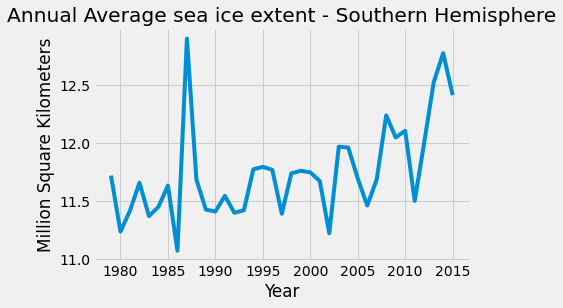

In [26]:
# plot the average annual extent
plt.plot(shannualextent_df)
plt.title('Annual Average sea ice extent - Southern Hemisphere')
plt.ylabel('Million Square Kilometers')
plt.xlabel('Year')


### Monthly Average Sea Ice Extent - Northern Hemisphere

In [27]:
# Group the dataset by month
shicemonths_df = southern_df.groupby(southern_df['Month'])


In [28]:
# Pull out mean of the 'Extent' variable
shmonthlyextent_df = shicemonths_df.mean()['Extent']
shmonthlyextent_df.head() 

Month
1     5.110503
2     3.139322
3     4.120755
4     6.971193
5    10.311829
Name: Extent, dtype: float64

Text(0.5, 0, 'Month')

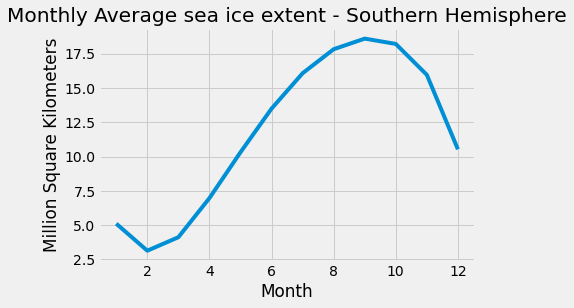

In [29]:
# plot the average annual extent
plt.plot(shmonthlyextent_df)
plt.title('Monthly Average sea ice extent - Southern Hemisphere')
plt.ylabel('Million Square Kilometers')
plt.xlabel('Month')
